## Observations and Insights 

1. When looking at the box and whiskers plot, Capomulin and Ramicane have the lowest tumor volume levels. This indicates that after treatments, these drugs may reduce the size of a tumor. 

2. We can test if Capomulin and Ramicane reduce the size of tumors by looking at the timeline of each subject. Specifically for mouse subject g288, we see a significant decrease in tumor size when given Capomulin.

3. With a correlation coefficient of 0.84, we see a fairly strong, positive relationship between the weight of a mouse and the average tumor volume. This means as the weight of a mouse increases, the average tumor size also increases. 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
df_mouse_metadata = pd.read_csv(mouse_metadata_path)
df_study_results = pd.read_csv(study_results_path)

In [2]:
df_mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
df_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
df_merge = pd.merge(df_mouse_metadata, df_study_results, on="Mouse ID", how="outer")

# Display the data table for preview
df_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
df_mouse_count = df_merge["Mouse ID"].count()
df_mouse_count

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_duplicate = df_merge[df_merge.duplicated(['Mouse ID', 'Timepoint'])]
df_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
df_mouse_id_duplicate = df_merge[df_merge.duplicated(['Mouse ID',])]
df_mouse_id_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df_merge.drop_duplicates("Mouse ID")
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
df_mouse_count = df_clean["Mouse ID"].count()
df_mouse_count

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
df_count = df_merge['Drug Regimen'].value_counts()
df_mean = df_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
df_median = df_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
df_variance = df_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
df_standard_dev = df_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
df_sem = df_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
df_summary = pd.DataFrame({"Trials": df_count, "Mean": df_mean, "Median": df_median, "Variance": df_variance, "Standard Deviation": df_standard_dev, "SEM": df_sem})
df_summary = df_summary.reset_index()
df_summary_renamed = df_summary.rename(columns={"index":"Drug Regimen"})
df_summary_renamed

,Drug Regimen,Trials,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_agg = df_merge.groupby("Drug Regimen").aggregate(['count', 'mean','median','var','std','sem'])["Tumor Volume (mm3)"]
df_agg.columns = ("Trials", "Mean", "Median", "Variance", "Standard Deviation", "SEM")
df_agg

,Trials,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
df_count_sorted = df_summary_renamed.sort_values(by="Trials", ascending=False)
# df_count_sorted = pd.DataFrame(df_count_sorted["Trials"])
df_count_sorted

,Drug Regimen,Trials,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
7,Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
3,Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
9,Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398
5,Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
8,Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
1,Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
6,Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884


<IPython.core.display.Javascript object>


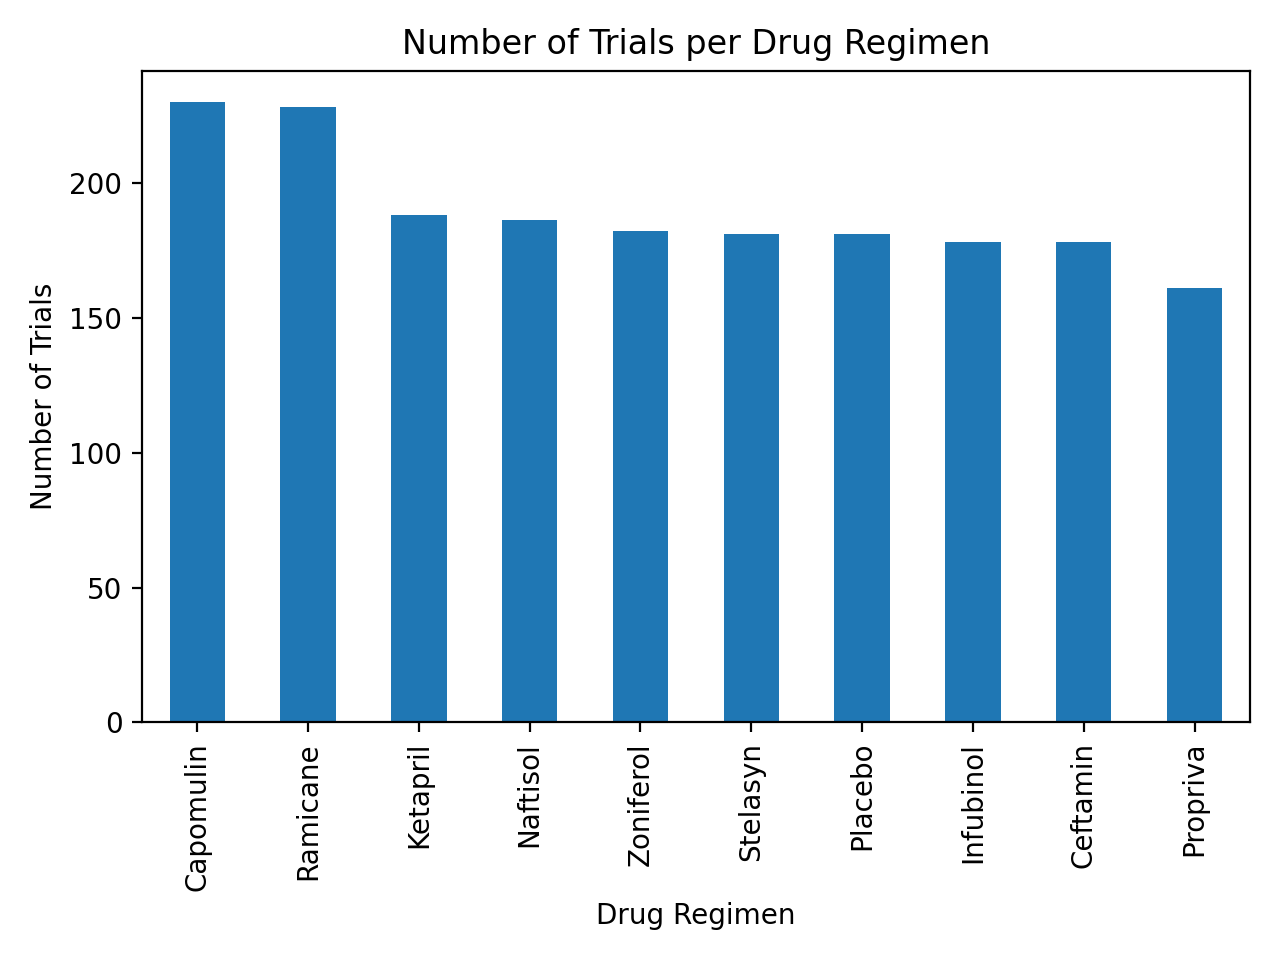

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
fig1, ax1 = plt.subplots()
bar_plot = df_merge["Drug Regimen"].value_counts().plot.bar(width=.5)
bar_plot.set(xlabel="Drug Regimen",
             ylabel="Number of Trials",
             title="Number of Trials per Drug Regimen")
plt.tight_layout()

<IPython.core.display.Javascript object>


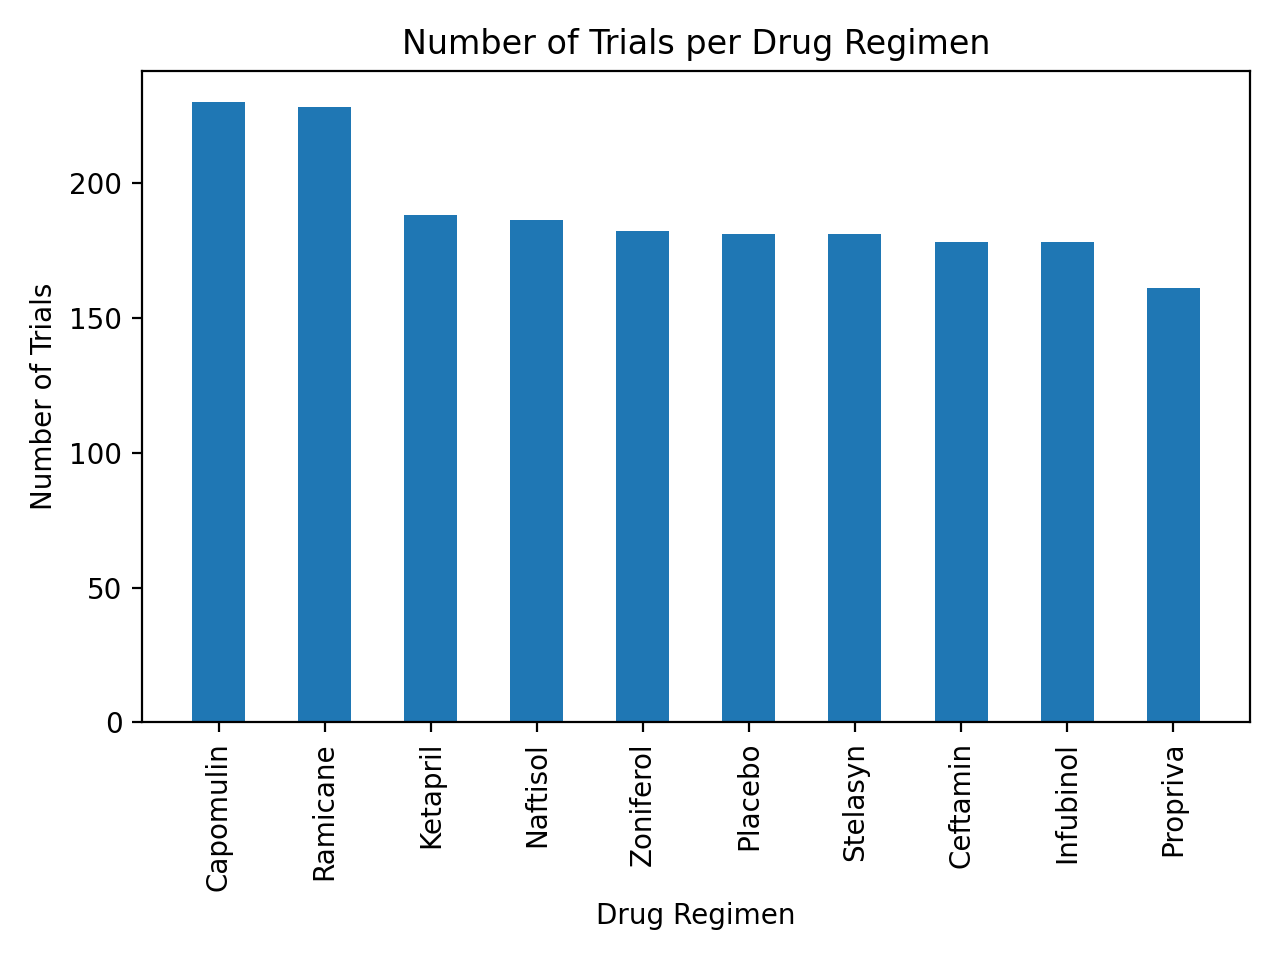

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
fig2, ax2 = plt.subplots()

# set x and y values
drug_regimen = df_count_sorted["Drug Regimen"]
trial_count = df_count_sorted["Trials"]

# plot x and y values and set size of bars
plt.bar(drug_regimen, trial_count, width=.5)

# rotate x axis labels
plt.xticks(rotation=90)

# name your axis and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")
plt.title("Number of Trials per Drug Regimen")

# display bar chart
plt.tight_layout()

<IPython.core.display.Javascript object>


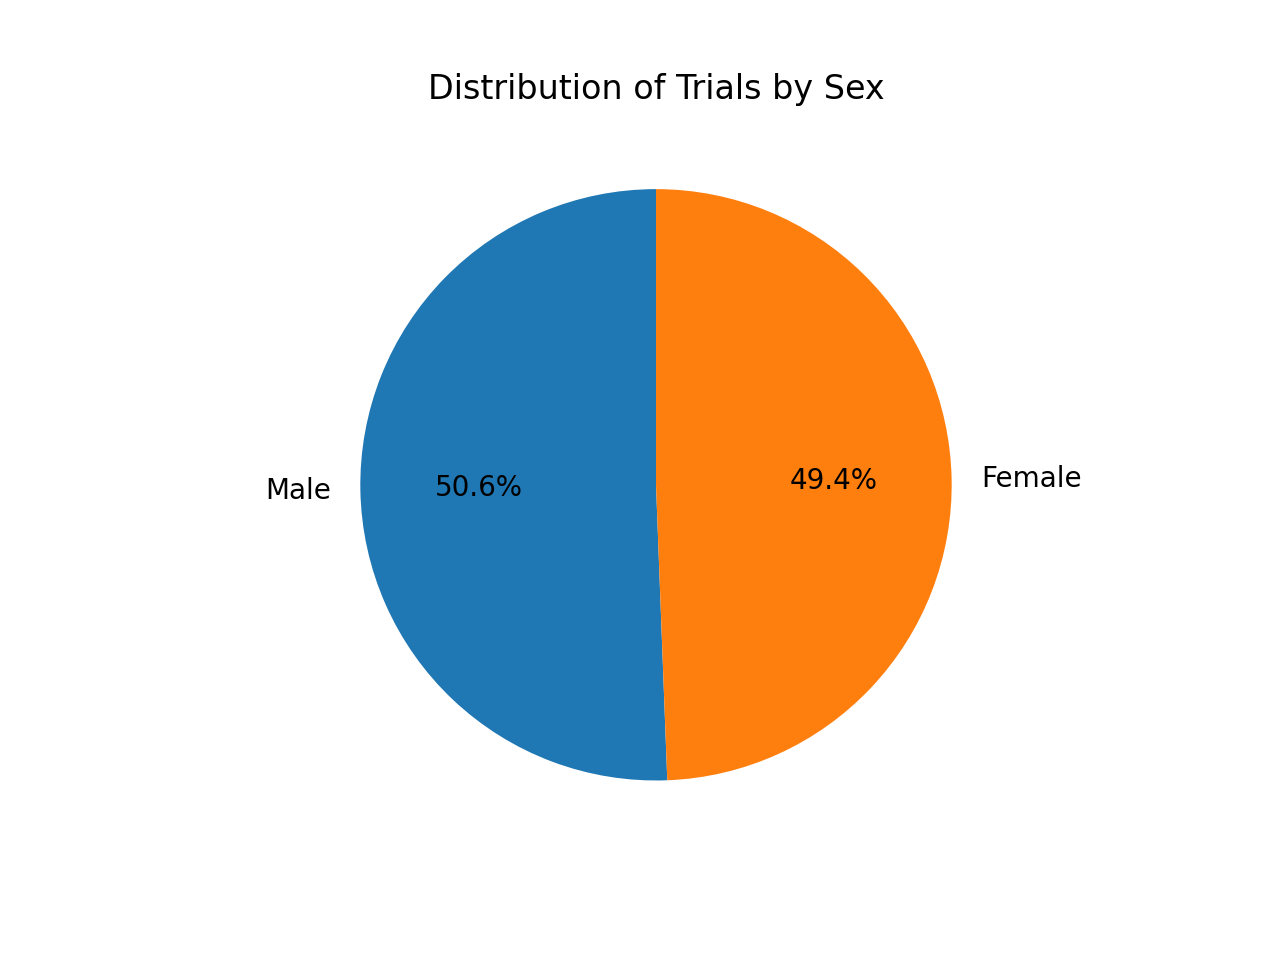

Text(0, 0.5, '')

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fig3, ax3 = plt.subplots()
pie_data = df_merge["Sex"].value_counts()
pie_plot = pie_data.plot.pie(autopct="%1.1f%%", startangle=90, title="Distribution of Trials by Sex")
pie_plot.set_ylabel('')

<IPython.core.display.Javascript object>


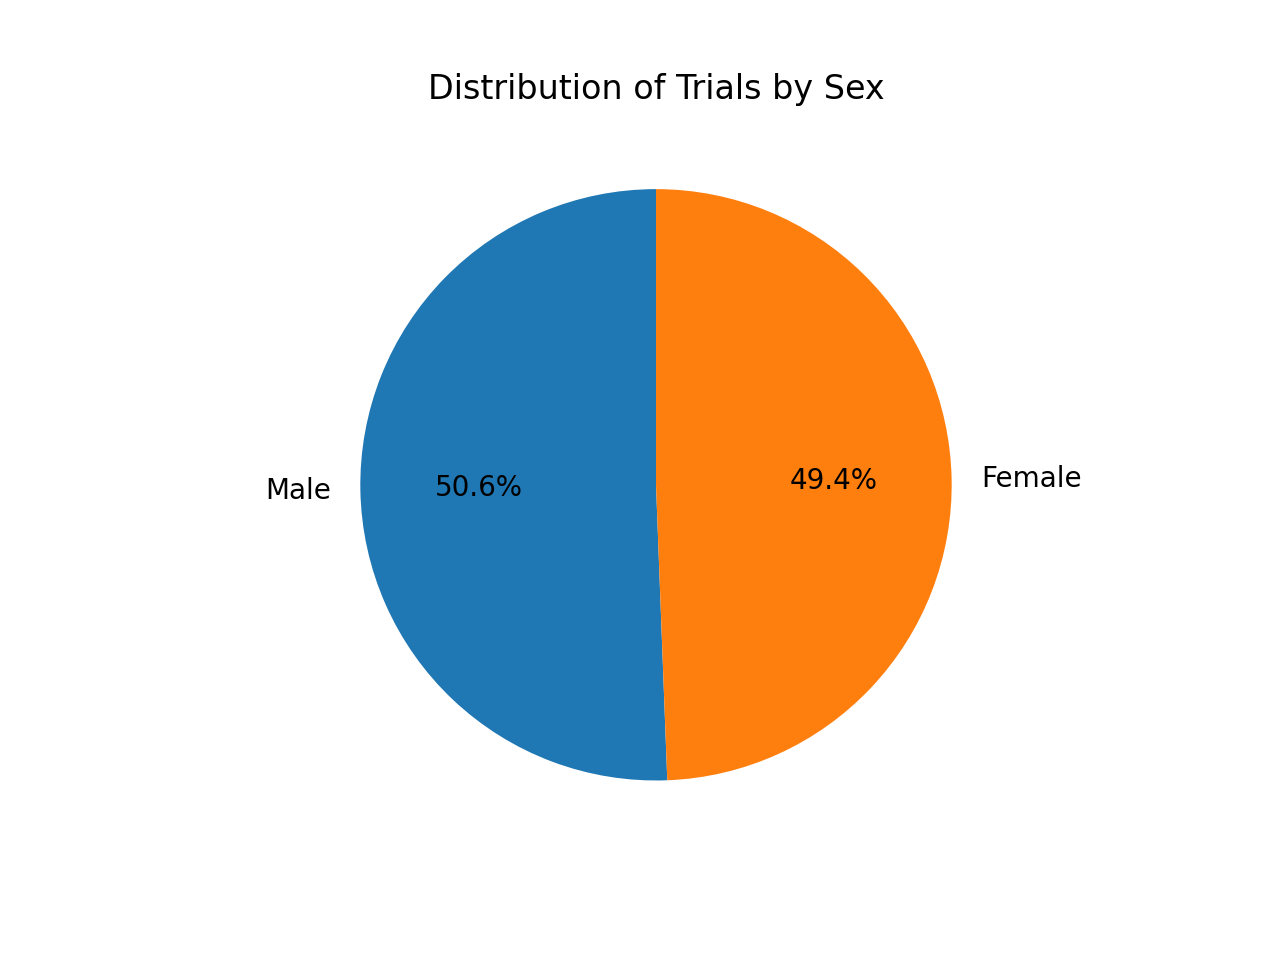

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig4, ax4 = plt.subplots()

# set values
pie_data = df_merge["Sex"].value_counts()

# plot values, labels
plt.pie(pie_data, labels=pie_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Trials by Sex")

# display pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
df_max_timepoint = pd.DataFrame(df_merge.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_merge_timepoint = pd.merge(df_merge, df_max_timepoint, on="Mouse ID")
df_merge_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    df = df_merge_timepoint.loc[df_merge_timepoint["Drug Regimen"] == drug]
    
    # add subset 
    df_final_vol = df.loc[df["Timepoint_x"] == df["Timepoint_y"]]
    
    # create a series that consists of all final volume values for each regimen
    values = df_final_vol["Tumor Volume (mm3)"]
    drug_values.append(values)
    
    # calculate quartules and IQR
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    # calculate upper and lower bounds to help identify outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # calculate outliers using upper and lower bounds
    outliers_count = (values.loc[(df_final_vol["Tumor Volume (mm3)"] >= upper_bound) | 
                                        (df_final_vol["Tumor Volume (mm3)"] <= lower_bound)]).count()
    # print stats
    print(f'''{drug} IQR: {iqr}
{drug} Lower Bound: {lower_bound}
{drug} Upper Bound: {upper_bound}
{drug} Outliers: {outliers_count}
-----------------------------------------''')

Capomulin IQR: 7.781863460000004
Capomulin Lower Bound: 20.70456164999999
Capomulin Upper Bound: 51.83201549
Capomulin Outliers: 0
-----------------------------------------
Ramicane IQR: 9.098536719999998
Ramicane Lower Bound: 17.912664470000003
Ramicane Upper Bound: 54.30681135
Ramicane Outliers: 0
-----------------------------------------
Infubinol IQR: 11.477135160000003
Infubinol Lower Bound: 36.83290494999999
Infubinol Upper Bound: 82.74144559000001
Infubinol Outliers: 1
-----------------------------------------
Ceftamin IQR: 15.577752179999997
Ceftamin Lower Bound: 25.355449580000002
Ceftamin Upper Bound: 87.66645829999999
Ceftamin Outliers: 0
-----------------------------------------


<IPython.core.display.Javascript object>


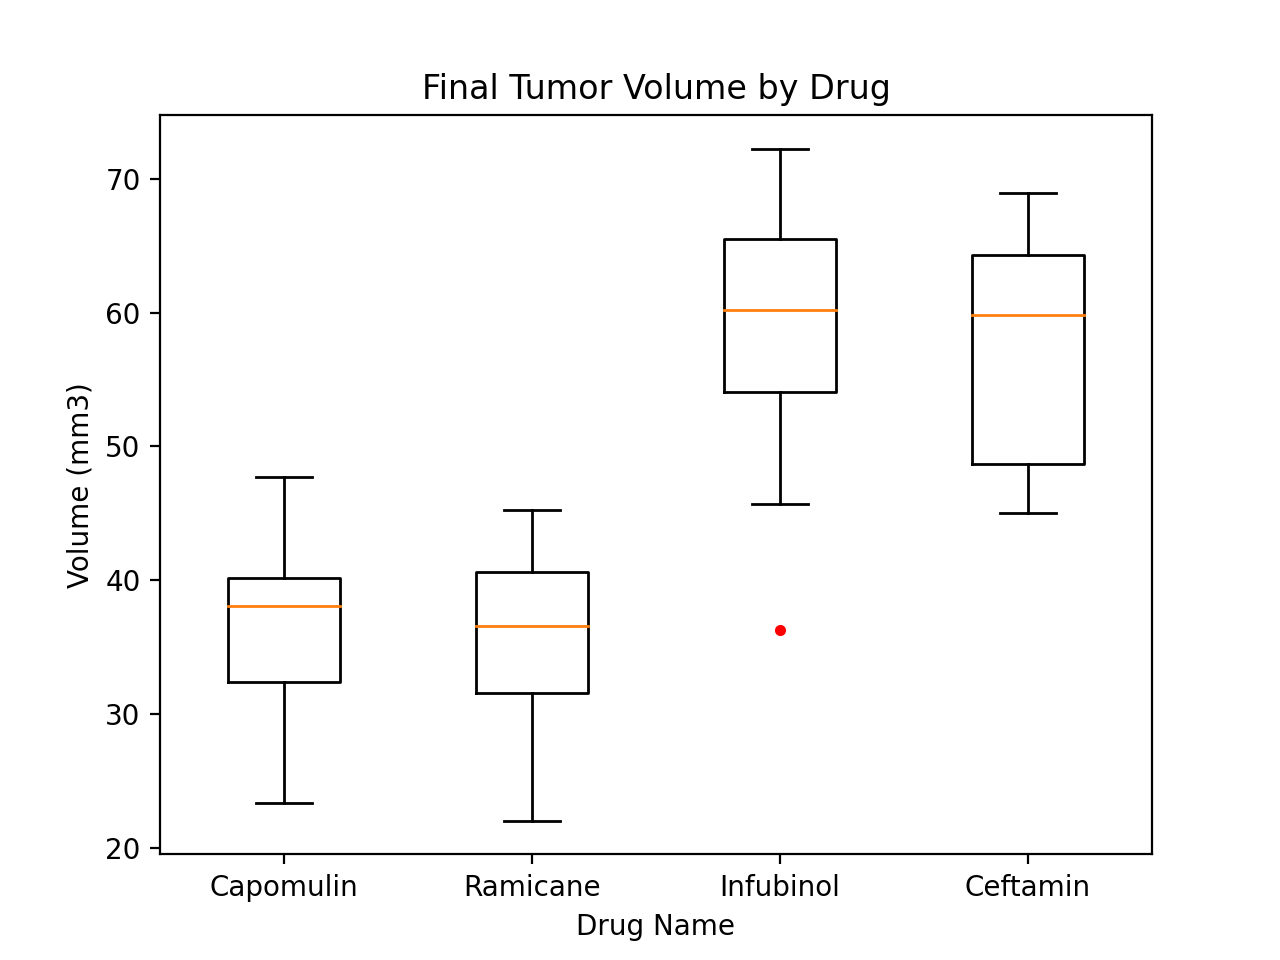

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig5, ax5 = plt.subplots()
ax5.boxplot(drug_values, sym='r.')
ax5.set(xlabel = "Drug Name",
       ylabel = "Volume (mm3)",
       title = "Final Tumor Volume by Drug")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


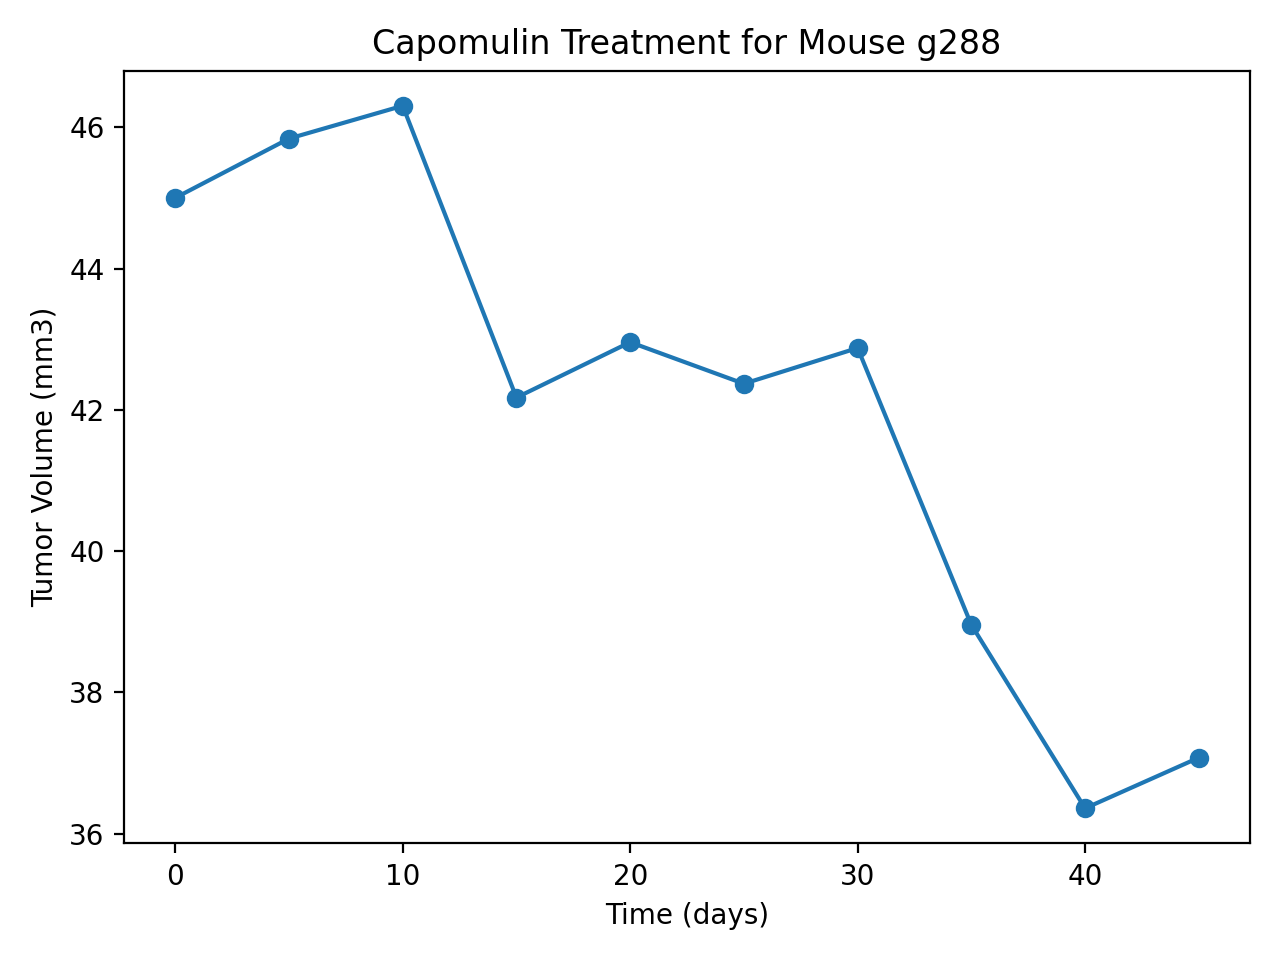

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
fig6, ax6 = plt.subplots()
mouse = df_merge.loc[df_merge["Mouse ID"] == "g288"]
ax6.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker="o")
ax6.set(xlabel = "Time (days)",
       ylabel = "Tumor Volume (mm3)",
       title = "Capomulin Treatment for Mouse g288")
plt.tight_layout()

<IPython.core.display.Javascript object>


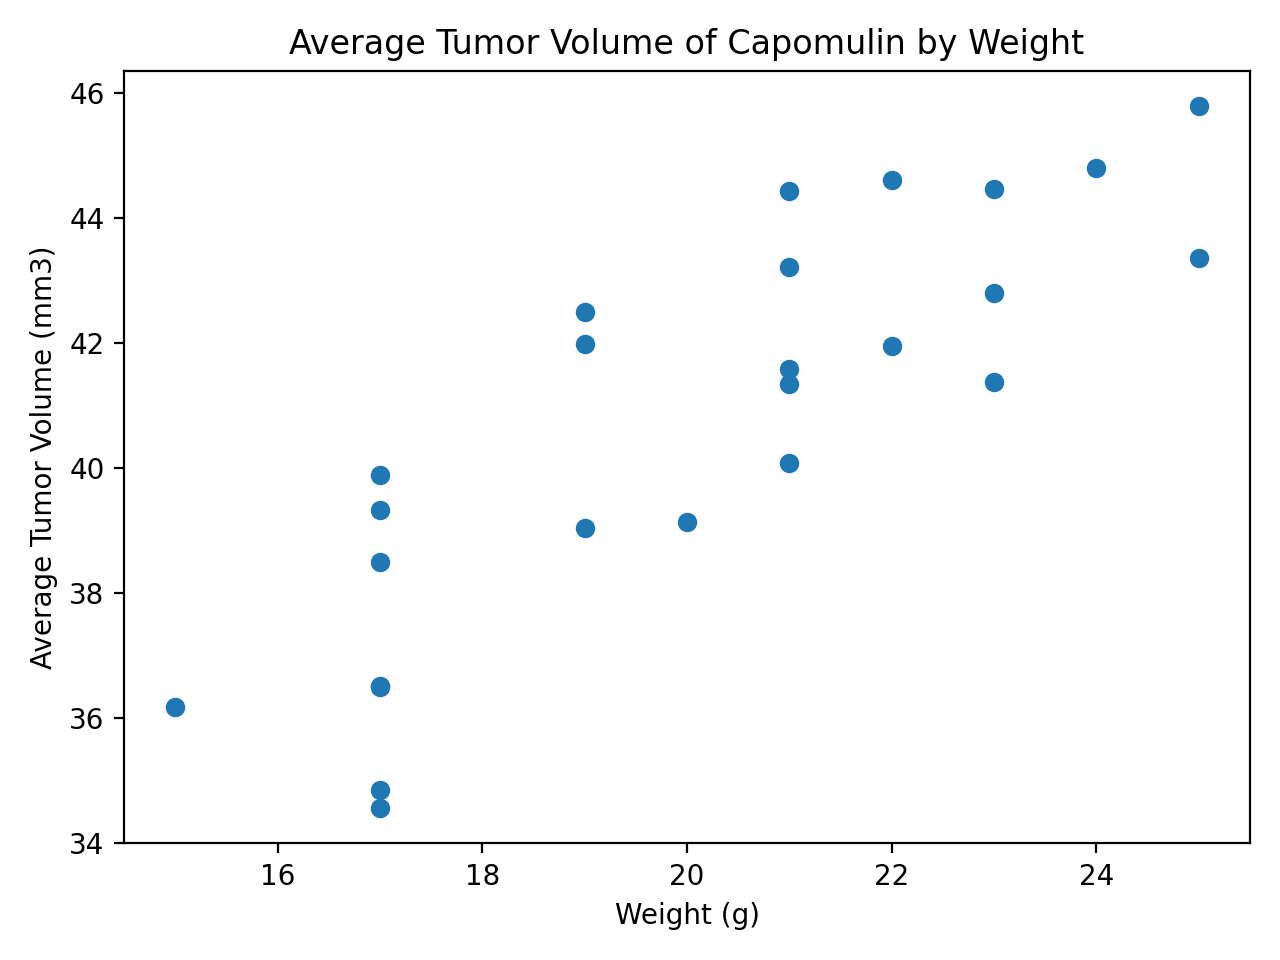

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# calculate average tumor volume and create new data frame with calculation
df_capomulin = df_merge.loc[df_merge["Drug Regimen"] == "Capomulin"]
df_average_vol = pd.DataFrame(df_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).reset_index().rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"})
df_average_vol_merge = pd.merge(df_capomulin, df_average_vol, on="Mouse ID")
df_final_average_vol = df_average_vol_merge[["Weight (g)", "Average Tumor Volume"]].drop_duplicates()

# plot average tumor volume data frame
fig7, ax7 = plt.subplots()
ax7.scatter(df_final_average_vol["Weight (g)"], df_final_average_vol["Average Tumor Volume"])
ax7.set(xlabel = "Weight (g)",
       ylabel = "Average Tumor Volume (mm3)",
       title = "Average Tumor Volume of Capomulin by Weight")
plt.tight_layout()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = st.pearsonr(df_final_average_vol["Weight (g)"], df_final_average_vol["Average Tumor Volume"])
correlation_coefficient

(0.8419363424694718, 1.3225722434712687e-07)

<IPython.core.display.Javascript object>


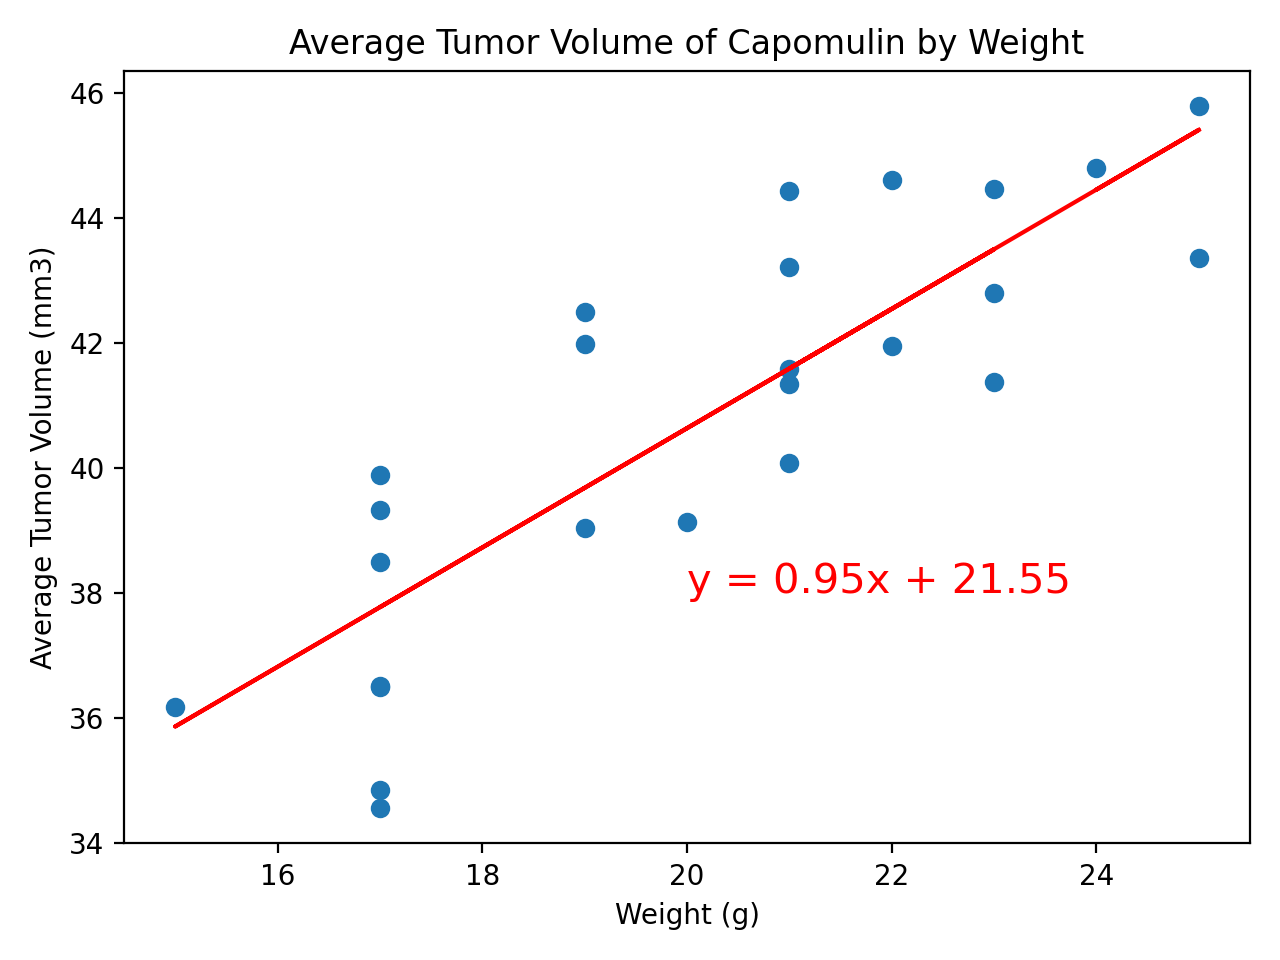

In [23]:
# perform a linear regression on mouse weight and average tumor volume for Capomulin
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_final_average_vol["Weight (g)"], df_final_average_vol["Average Tumor Volume"])
prediction = slope * df_final_average_vol["Weight (g)"] + intercept

# plot scatter plot and regression line
fig8, ax8 = plt.subplots()
ax8.scatter(df_final_average_vol["Weight (g)"], df_final_average_vol["Average Tumor Volume"])
ax8.plot(df_final_average_vol["Weight (g)"], prediction, color="red")

# annotate regression line formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax8.annotate(line_eq,(20,38), fontsize=15, color="red")

# set labels and title
ax8.set(xlabel = "Weight (g)",
       ylabel = "Average Tumor Volume (mm3)",
       title = "Average Tumor Volume of Capomulin by Weight")

# display
plt.tight_layout()